# [Retrievers in LangChain](https://python.langchain.com/docs/integrations/retrievers/)

A retriever is a component in LangChain that fetches relevant documents from a
data source in response to a user’s query. <br>
There are multiple types of retrievers <br>
All retrievers in LangChain are runnables 


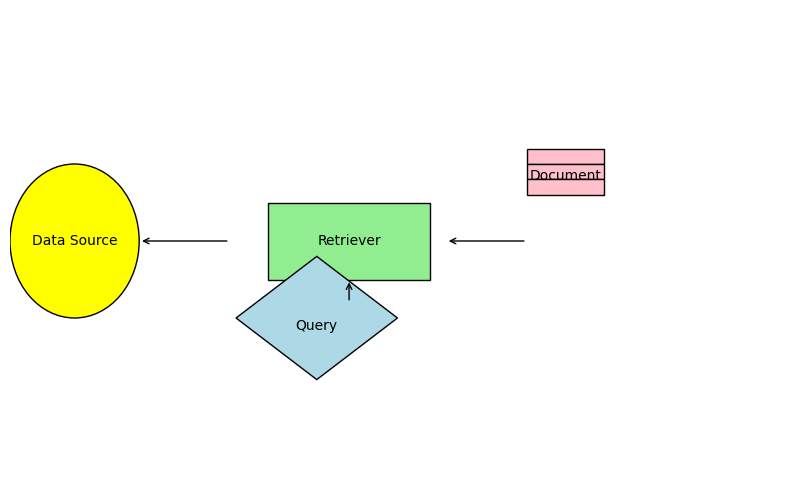

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, Polygon

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)
ax.axis('off')  # turn off axes

# Draw the Data Source (circle)
data_source = Circle((1, 3), 1, color='yellow', ec='black')
ax.add_patch(data_source)
ax.text(1, 3, 'Data Source', ha='center', va='center')

# Draw the Retriever (rectangle)
retriever = Rectangle((4, 2.5), 2.5, 1, color='lightgreen', ec='black')
ax.add_patch(retriever)
ax.text(5.25, 3, 'Retriever', ha='center', va='center')

# Draw the Document (stacked pages)
# Since matplotlib doesn't have a stack of pages, we can draw multiple rectangles
for i in range(3):
    rect = Rectangle((8, 4 - i*0.2), 1.2, 0.2, color='pink', ec='black')
    ax.add_patch(rect)
ax.text(8.6, 3.85, 'Document', ha='center', va='center')

# Draw the Query (diamond)
query_coords = [(3.5, 2), (4.75, 1.2), (6, 2), (4.75, 2.8)]
query = Polygon(query_coords, closed=True, color='lightblue', ec='black')
ax.add_patch(query)
ax.text(4.75, 1.9, 'Query', ha='center', va='center')

# Draw arrows
ax.annotate('', xy=(2, 3), xytext=(3.4, 3), arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(6.75, 3), xytext=(8, 3), arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(5.25, 2.5), xytext=(5.25, 2.2), arrowprops=dict(arrowstyle='->'))

# Show plot
plt.show()

## What are Retrievers?

**Retrievers** in LangChain are components that take a user query and return the most relevant documents or pieces of information from a data source, typically for use as context in large language model (LLM) applications. Retrievers enable Retrieval-Augmented Generation (RAG) workflows, where an LLM is augmented with external knowledge at answer time.

### Why Use Retrievers?

- **Context Injection:** They inject relevant background information into LLM prompts, improving accuracy and relevance.
- **Efficient Search:** They provide fast, scalable, and semantic search over large corpora.
- **Flexible Sources:** They can retrieve from databases, vector stores, APIs, or custom backends.

### How Do Retrievers Work?

1. **Query Input:** The retriever receives a user’s natural language query.
2. **Transformation (optional):** The query may be rephrased, embedded, or otherwise transformed.
3. **Search:** The retriever searches its underlying data source for relevant information (using keyword, embedding similarity, hybrid, or custom logic).
4. **Return:** It returns a list of `Document` objects (or similar), ready for use in LLM prompts.

### Types of Retrievers in LangChain

#### 1. VectorStoreRetriever (Most common)
- Uses a vector store (e.g., FAISS, Chroma, Pinecone) to find documents semantically similar to the query embedding.
- Example:
    ```python
    retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
    docs = retriever.get_relevant_documents("What is LangChain?")
    ```

#### 2. SelfQueryRetriever
- Uses an LLM to parse the query and generate structured search parameters, enabling more complex queries (like filters).

#### 3. BM25Retriever & ElasticSearchRetriever
- Use traditional keyword-based search (BM25, Elasticsearch) for lexical retrieval.

#### 4. MultiQueryRetriever
- Generates multiple variations of the user query (using an LLM) and retrieves documents for each, merging results for higher recall.

#### 5. ParentDocumentRetriever
- Retrieves parent documents based on matches in smaller child chunks, preserving full context.

#### 6. ContextualCompressionRetriever
- Combines retrieval with compression (summarization, re-ranking, etc.) for concise context delivery.

#### 7. TimeWeightedVectorStoreRetriever
- Adds recency or time-based weighting to retrieval (useful for chat/history).

#### 8. EnsembleRetriever
- Combines results from multiple retrievers (e.g., vector + keyword).


#### Retriever vs. Vector Store

- **Vector stores** store and index embeddings for fast similarity search.
- **Retrievers** are the interface that queries the vector store (or other backend), applies logic/filters, and returns results.


### Example: Basic Vector Store Retriever

```python
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

vectorstore = FAISS.from_texts(["Doc1", "Doc2", "Doc3"], OpenAIEmbeddings())
retriever = vectorstore.as_retriever()
results = retriever.get_relevant_documents("What is Doc1 about?")
```
### When to Use Retrievers

- For RAG pipelines (supplying external knowledge to LLMs).
- For document Q&A, semantic search, and chatbots.
- When your data is too large to fit in a single LLM prompt.

**Summary:**  
Retrievers in LangChain are the crucial interface for searching and fetching relevant data to provide context to LLMs, powering accurate and scalable retrieval-augmented applications.

# Types of Retrievers in LangChain

LangChain offers a variety of retriever classes, each designed for different retrieval strategies and use cases. Below are the main types and a brief description of each:

### 1. **VectorStoreRetriever**
- **Description:** The most common retriever in LangChain, it queries a vector store (e.g., FAISS, Pinecone, Chroma) using embedding similarity to return documents most similar to the query.
- **Use Case:** Semantic search, RAG pipelines, document Q&A.
- **Example:**
  ```python
  retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
  docs = retriever.get_relevant_documents("What is LangChain?")
  ```

### 2. **BM25Retriever**
- **Description:** Uses the BM25 algorithm (a classic keyword-based search method) to find documents based on lexical similarity.
- **Use Case:** When traditional keyword relevance is preferred or when embeddings are not suitable.

## 3. **ElasticSearchRetriever / OpenSearchRetriever**
- **Description:** Retrieves documents using Elasticsearch or OpenSearch, supporting both keyword and vector search.
- **Use Case:** Enterprise search and hybrid search scenarios.

### 4. **SelfQueryRetriever**
- **Description:** Uses an LLM to parse the user’s query and generate structured search parameters (e.g., filters, metadata constraints) for the underlying vector store.
- **Use Case:** Advanced queries that require not just similarity, but also filtering or conditional logic.

### 5. **MultiQueryRetriever**
- **Description:** Uses an LLM to generate multiple diverse variations of the user query, retrieves documents for each, and merges the results for higher recall.
- **Use Case:** Increasing coverage and robustness, especially for ambiguous or broad queries.


### 6. **ParentDocumentRetriever**
- **Description:** Retrieves parent documents based on matches found in smaller, embedded child chunks, ensuring more context is provided.
- **Use Case:** When you want to return an entire section or document instead of just a small chunk.


### 7. **ContextualCompressionRetriever**
- **Description:** After retrieval, compresses or summarizes the documents (using an LLM or other compressor) before passing them to the LLM, providing concise context.
- **Use Case:** When prompt size is limited or concise context is needed.


### 8. **TimeWeightedVectorStoreRetriever**
- **Description:** Adds recency or time-based weighting to the retrieval process, prioritizing more recent documents.
- **Use Case:** Chatbots or applications where the most recent interactions are most relevant.

## 9. **EnsembleRetriever**
- **Description:** Combines the results of multiple retrievers (e.g., vector + keyword) for hybrid retrieval.
- **Use Case:** Maximizing recall and precision by leveraging multiple retrieval strategies.

### 10. **KNNRetriever**
- **Description:** Performs k-nearest neighbors search on pre-computed document embeddings, sometimes outside a formal vector store.
- **Use Case:** Lightweight or custom embedding stores.

### 11. **TFIDFRetriever**
- **Description:** Uses the TF-IDF algorithm for classic keyword relevance scoring.
- **Use Case:** Simple, local, or prototyping scenarios.

**Summary:**  
LangChain provides a broad suite of retrievers, from semantic vector search to classic keyword and hybrid methods, enabling flexible and powerful retrieval-augmented LLM workflows.

# Wikipedia Retriever
A Wikipedia Retriever is a retriever that queries the Wikipedia API to fetch relevant content for
a given query.
### How It Works

1. You give it a query (e.g., "Albert Einstein")  
2. It sends the query to Wikipedia's API  
3. It retrieves the **most relevant articles**  
4. It returns them as LangChain **Document** objects

## What is the Wikipedia Retriever?

The **Wikipedia Retriever** in LangChain is a retriever that fetches relevant information directly from Wikipedia in response to user queries. Instead of searching a local database or vector store, it issues real-time searches against Wikipedia's vast content, returning the most relevant page excerpts as `Document` objects. This is especially useful for augmenting LLMs with up-to-date, encyclopedic knowledge without building or maintaining your own corpus.

### Features

- **Live Retrieval:** Searches Wikipedia in real time for each query.
- **Relevance Ranking:** Returns the most relevant articles or paragraphs based on the query.
- **Plug-and-Play:** No need to create embeddings or vector stores for Wikipedia content.
- **Language Support:** Can be configured to search Wikipedia in different languages.

### Example Usage

```python
from langchain.retrievers import WikipediaRetriever

# Initialize the retriever (English Wikipedia by default)
retriever = WikipediaRetriever()

# Retrieve documents relevant to your query
docs = retriever.get_relevant_documents("What is LangChain?")

# Print the top result
print(docs[0].page_content)
```

**Specifying Language:**
```python
retriever = WikipediaRetriever(lang="fr")  # French Wikipedia
docs = retriever.get_relevant_documents("Qu'est-ce que LangChain ?")
```
### When to Use the Wikipedia Retriever

- When you want to supplement your LLM with real-time, factual, and encyclopedic knowledge.
- For RAG pipelines where up-to-date public information is needed.
- If you want to avoid the setup or cost of maintaining a large local corpus for general knowledge queries.

**Summary:**  
The Wikipedia Retriever in LangChain allows you to retrieve and inject relevant Wikipedia content directly into your LLM pipelines, providing dynamic, up-to-date answers from one of the world’s largest knowledge bases.

# Vector Store Retriever
A Vector Store Retriever in LangChain is the most common type of retriever that lets you
search and fetch documents from a vector store based on semantic similarity using vector
embeddings.
### How It Works

1. You store your **documents** in a **vector store** (like FAISS, Chroma, Weaviate)  
2. Each document is converted into a **dense vector** using an **embedding** model  
3. When the user enters a query:
   - It's also turned into a **vector**
   - The retriever compares the query **vector** with the stored vectors
   - It retrieves the **top-k most similar ones**


## What is a VectorStoreRetriever?

A **VectorStoreRetriever** is a retriever in LangChain that uses a vector store (such as FAISS, Chroma, Pinecone, etc.) to find and return documents that are semantically similar to a given user query. It is the most common retriever used for semantic search and is the core retrieval mechanism in many RAG (Retrieval-Augmented Generation) pipelines.
### How Does It Work?

1. **Embedding Creation:** When a user submits a query, the query is converted into a vector embedding using the same embedding model used to store the documents.
2. **Similarity Search:** The embedding is compared to all stored document embeddings in the vector store using a similarity metric (often cosine similarity).
3. **Retrieval:** The top-k most similar documents are returned as relevant context for downstream tasks (like LLM prompts).

### Why Use VectorStoreRetriever?

- **Semantic Search:** Finds documents based on meaning, not just keywords.
- **Scalable:** Efficiently handles large document collections.
- **Plug-and-Play:** Easy to use with any supported vector store in LangChain.
- **Customizable:** Supports filtering, metadata, and different similarity metrics.

### Example Usage

```python
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Step 1: Build a vector store with your documents
texts = ["LangChain is a framework for LLM apps.", "FAISS is a vector database.", "Retrievers inject context."]
embeddings = OpenAIEmbeddings()
vectorstore = FAISS.from_texts(texts, embeddings)

# Step 2: Create a retriever from the vector store
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

# Step 3: Retrieve relevant documents for a query
docs = retriever.get_relevant_documents("What is LangChain?")
for doc in docs:
    print(doc.page_content)
```

### Customization

- **search_kwargs:**  
  - `k`: Number of top documents to retrieve.
  - `filter`: (if supported by the vector store) Metadata filter for more precise results.

### When to Use VectorStoreRetriever

- For semantic search over your document corpus.
- In RAG pipelines to inject external context into LLM answers.
- Whenever you need fast, meaningful retrieval from large text collections.

**Summary:**  
The VectorStoreRetriever is the standard retriever in LangChain for semantic search, retrieving the most relevant documents from a vector store to provide rich, contextual information for LLM-powered applications.

# Maximal Marginal Relevance (MMR)
> "How can we pick results that are not only relevant to the query but also different from each other?"  
  
MMR is an information retrieval algorithm designed to reduce redundancy in the retrieved results while maintaining high relevance to the query.

### Why MMR Retriever?

In **regular similarity search**, you may get documents that are:
- All very similar to each other
- Repeating the same info
- Lacking diverse perspectives

MMR Retriever avoids that by:
- Picking the **most relevant document** first
- Then picking the **next most relevant** and **least similar** to already selected docs
- And so on...

This helps especially in RAG pipelines where:
- You want your context window to contain **diverse but still relevant information**
- Especially useful when documents are semantically overlapping

| Doc ID | Content                                              |
|--------|------------------------------------------------------|
| D1     | "Climate change is causing glaciers to melt rapidly in the Arctic region." |
| D2     | "Glaciers in the Arctic are melting at an alarming rate due to rising temperatures." |
| D3     | "Deforestation in the Amazon is accelerating global climate change." |
| D4     | "Climate change is increasing the frequency of wildfires in California." |
| D5     | "Rising sea levels due to climate change threaten coastal cities like Mumbai and New York." |

### Top 3 results:
1. **D1**: Arctic glaciers melting
2. **D2**: Arctic glaciers melting
3. **D5**: Rising sea levels in coastal cities

### Top 3 results:
1. **D1**: Arctic glaciers melting
2. **D4**: Wildfires in California
3. **D5**: Rising sea levels in coastal cities

## What is Maximal Marginal Relevance (MMR)?

**Maximal Marginal Relevance (MMR)** is an information retrieval technique that aims to maximize the relevance of retrieved items while minimizing redundancy. In the context of LangChain and LLM pipelines, MMR is used to select diverse and relevant chunks or documents from a vector store, ensuring the returned set covers different aspects of the user query rather than just repeating similar content.

### Why Use MMR?

- **Reduces Redundancy:** Prevents returning multiple nearly identical results that don’t add value.
- **Increases Diversity:** Ensures the retrieved set covers a wider range of topics or perspectives relevant to the query.
- **Improves User Satisfaction:** Users get more comprehensive and less repetitive answers.

### How Does MMR Work?

MMR works by:
1. Ranking candidate documents by their similarity to the query.
2. Iteratively selecting documents that are both highly relevant to the query and maximally dissimilar from documents already selected.
3. The process continues until `k` documents are selected.

The selection is based on a trade-off parameter (λ, lambda) between relevance and diversity.

### MMR in LangChain

LangChain supports MMR in its retrievers, especially when using vector stores for semantic search.

#### Enabling MMR in a VectorStoreRetriever

```python
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Build your vector store
texts = ["Doc 1...", "Doc 2...", "Doc 3..."]
embeddings = OpenAIEmbeddings()
vectorstore = FAISS.from_texts(texts, embeddings)

# Use as a retriever with MMR enabled
retriever = vectorstore.as_retriever(
    search_type="mmr",                # Enable MMR
    search_kwargs={
        "k": 5,                       # Number of docs to return
        "fetch_k": 20,                # Number of candidates to consider
        "lambda_mult": 0.5            # Balance between relevance and diversity (0 = max diversity, 1 = max relevance)
    }
)

results = retriever.get_relevant_documents("Explain maximal marginal relevance")
```

- `k`: Final number of documents to return.
- `fetch_k`: Number of top candidates to consider before MMR selection.
- `lambda_mult`: Controls the relevance-diversity tradeoff.

### When to Use MMR

- When you want diverse, non-redundant results (e.g., Q&A, summarization, search).
- If your corpus has many similar or overlapping documents.
- In RAG, to provide a broader context for the LLM.

**Summary:**  
Maximal Marginal Relevance (MMR) in LangChain enables retrievers to return results that are both highly relevant and diverse, reducing redundancy and improving the quality of information provided to users.

# Multi-Query Retriever

> Sometimes a single query might not capture all the ways information is phrased in your documents.

For example:

**Query**: "How can I stay healthy?"

Could mean:
- What should I eat?
- How often should I exercise?
- How can I manage stress?

A simple similarity search might **miss documents** that talk about those things but don’t use the word "healthy."
> "How can I stay healthy?"
1. **"What are the best foods to maintain good health?"**
2. **"How often should I exercise to stay fit?"**
3. **"What lifestyle habits improve mental and physical wellness?"**
4. **"How can I boost my immune system naturally?"**

### How it works
1. Takes your original query
2. Uses an LLM (e.g., GPT-3.5) to generate multiple semantically different versions of that query
3. Performs retrieval for each sub-query
4. Combines and deduplicates the results

### What is the MultiQueryRetriever?

The **MultiQueryRetriever** is a retriever in LangChain that enhances recall by leveraging an LLM to generate multiple diverse reformulations of a user’s query. For each query variant, it retrieves relevant documents from the underlying retriever (often a vector store or other retriever), then merges the results. This approach increases the chances of capturing all relevant information, especially for ambiguous or broad queries.

### Why Use MultiQueryRetriever?

- **Higher Recall:** By searching with several rephrased queries, you gather more potentially relevant documents.
- **Diverse Coverage:** Captures different phrasings, synonyms, or aspects of the user’s intent.
- **Reduces Misses:** Helps when a single query might not match all relevant documents due to vocabulary mismatch or ambiguity.

### How Does It Work?

1. **LLM Reformulation:** The MultiQueryRetriever uses an LLM to generate several diverse variants of the original user query.
2. **Parallel Retrieval:** Each variant is used to retrieve documents from the base retriever (e.g., a VectorStoreRetriever).
3. **Result Merging:** Results from all queries are merged (deduplicated) and returned as the final set.

### Example Usage

```python
from langchain.retrievers.multi_query import MultiQueryRetriever
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.llms import OpenAI

# Set up your base vector store retriever
texts = ["LangChain supports RAG.", "You can retrieve documents using embeddings.", "MultiQueryRetriever increases recall."]
embeddings = OpenAIEmbeddings()
vectorstore = FAISS.from_texts(texts, embeddings)
base_retriever = vectorstore.as_retriever()

# Set up the LLM
llm = OpenAI(temperature=0)

# Create the MultiQueryRetriever
multi_query_retriever = MultiQueryRetriever.from_llm(
    retriever=base_retriever,
    llm=llm
)

# Retrieve documents
results = multi_query_retriever.get_relevant_documents("How does LangChain retrieve information?")
for doc in results:
    print(doc.page_content)
```

### When to Use MultiQueryRetriever

- When a single query might not surface all relevant documents.
- For ambiguous, complex, or broad user questions.
- For knowledge bases, RAG pipelines, or any application where maximizing relevant context is important.

**Summary:**  
The MultiQueryRetriever in LangChain uses an LLM to generate diverse query variants, improving recall and coverage when retrieving relevant documents for downstream LLM tasks.

# Contextual Compression Retriever

The **Contextual Compression Retriever** in LangChain is an advanced retriever that improves retrieval quality by **compressing documents** after retrieval — keeping only the relevant content based on the user's query.

#### Query:
> "What is photosynthesis?"

#### Retrieved Document (by a traditional retriever):
> "The Grand Canyon is a famous natural site. Photosynthesis is how plants convert light into energy. Many tourists visit every year."

*Note: the highlighted part is the relevant content.*

#### Problem:
- The retriever returns the **entire paragraph**
- Only **one sentence** is actually relevant to the query
- The rest is **irrelevant noise** that wastes context window and may confuse the LLM

#### What Contextual Compression Retriever does:
Returns only the relevant part, e.g.:
- "*Photosynthesis is how plants convert light into energy.*"

#### How It Works
1. Base Retriever (e.g., FAISS, Chroma) retrieves **N documents**
2. A **compressor** (usually an LLM) is applied to each document
3. The compressor **keeps only the parts relevant to the query**
4. Irrelevant content is **discarded**

#### When to Use
- Your documents are **long** and contain **mixed information**
- You want to **reduce context length** for LLMs
- You need to **improve answer accuracy** in RAG pipelines

## What is the ContextualCompressionRetriever?

The **ContextualCompressionRetriever** is a retriever wrapper in LangChain that combines two key steps:
1. **Retrieval:** First, it uses a base retriever (often a vector store retriever) to fetch a set of potentially relevant documents.
2. **Compression:** Next, it uses a compressor (such as an LLM, summarizer, or filter) to condense, filter, or summarize the retrieved documents—returning only the most relevant, concise, and contextually appropriate information to the user or downstream LLM.

This approach helps manage context window limitations and improves the quality of information injected into LLM prompts.

### Why Use ContextualCompressionRetriever?

- **Reduces Noise:** Filters out irrelevant or redundant content from retrieved documents.
- **Fits Context Windows:** Compresses and summarizes results to fit within LLM input limits.
- **Enhances Relevance:** Ensures that only the most pertinent information is passed to the LLM for answer generation.
- **Composable:** You can use different compressors (LLM, keyword, filters, etc.) and combine with any base retriever.

### How Does It Work?

1. The retriever fetches a batch of candidate documents.
2. The compressor (e.g., an LLM or summarizer) processes each candidate, retaining only the most relevant or summarized content.
3. The output is a compressed set of documents, maximizing information density and relevance.

### Example Usage

```python
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.llms import OpenAI

# 1. Set up your base retriever (e.g., from a vector store)
texts = ["Doc about LLMs.", "Doc about retrievers.", "Doc about compressors."]
embeddings = OpenAIEmbeddings()
vectorstore = FAISS.from_texts(texts, embeddings)
base_retriever = vectorstore.as_retriever()

# 2. Set up a compressor (e.g., LLM-based extractor)
llm = OpenAI(temperature=0)
compressor = LLMChainExtractor.from_llm(llm)

# 3. Combine into a ContextualCompressionRetriever
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=base_retriever,
)

# 4. Retrieve and compress relevant docs
results = compression_retriever.get_relevant_documents("Explain retrievers in LangChain.")
for doc in results:
    print(doc.page_content)
```

### When to Use ContextualCompressionRetriever

- When your raw retrieved documents are too verbose or contain irrelevant information.
- If you need to fit more info into a limited context window for LLM prompts.
- For improved downstream LLM performance in RAG, summarization, or Q&A tasks.

**Summary:**  
ContextualCompressionRetriever in LangChain wraps a retriever with a compressor, ensuring that returned results are concise, contextually relevant, and optimized for LLM consumption.